In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "friuli venezia giulia"

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,31.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,25.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,27.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,28.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,20.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2021-03-09T17:00:00,6,Friuli Venezia Giulia,478,60,538,11672,12210,173,598,...,14.0,9178.0,2604.0,150.0,11.15,4.41,6.52,22.96,3.45,1.44
379,2021-03-10T17:00:00,6,Friuli Venezia Giulia,489,64,553,12118,12671,461,866,...,12.0,9558.0,3799.0,446.0,11.57,4.36,9.06,22.80,6.67,3.78
380,2021-03-11T17:00:00,6,Friuli Venezia Giulia,497,61,558,12616,13174,503,991,...,16.0,10787.0,4510.0,498.0,10.93,4.24,9.19,21.97,-4.69,3.97
381,2021-03-12T17:00:00,6,Friuli Venezia Giulia,498,65,563,13178,13741,567,971,...,14.0,12424.0,4748.0,562.0,11.55,4.10,7.82,20.45,6.56,4.30


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 13, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 953
Nuovi tamponi: 10288.0
Percentuale nuovi positivi/nuovi tamponi: 9.3 %
Nuovi guariti: 504.0
Nuovi deceduti: 15.0
Variazione positivi ricoverati con sintomi: 6.0
Variazione positivi in terapia intensiva: 0.0
Variazione positivi in isolamento dimiciliare: 428.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 13, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-12T17:00:00,6,Friuli Venezia Giulia,671,68,739,12179,12918,-1,647,...,22.0,7714.0,2051.0,15.0,9.20,5.72,8.39,31.55,1.49,-0.01
1,2021-01-13T17:00:00,6,Friuli Venezia Giulia,665,69,734,12064,12798,-120,546,...,31.0,7281.0,1404.0,-115.0,9.40,5.74,7.50,38.89,1.47,-0.93
2,2021-01-14T17:00:00,6,Friuli Venezia Giulia,668,68,736,12127,12863,65,805,...,25.0,7969.0,2159.0,63.0,9.24,5.72,10.10,37.29,-1.45,0.51
3,2021-01-15T17:00:00,6,Friuli Venezia Giulia,688,68,756,12123,12879,16,919,...,29.0,10634.0,3679.0,-4.0,8.99,5.87,8.64,24.98,0.00,0.12
4,2021-01-16T17:00:00,6,Friuli Venezia Giulia,682,66,748,12235,12983,104,870,...,35.0,9181.0,3214.0,112.0,8.82,5.76,9.48,27.07,-2.94,0.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-03-09T17:00:00,6,Friuli Venezia Giulia,478,60,538,11672,12210,173,598,...,14.0,9178.0,2604.0,150.0,11.15,4.41,6.52,22.96,3.45,1.44
57,2021-03-10T17:00:00,6,Friuli Venezia Giulia,489,64,553,12118,12671,461,866,...,12.0,9558.0,3799.0,446.0,11.57,4.36,9.06,22.80,6.67,3.78
58,2021-03-11T17:00:00,6,Friuli Venezia Giulia,497,61,558,12616,13174,503,991,...,16.0,10787.0,4510.0,498.0,10.93,4.24,9.19,21.97,-4.69,3.97
59,2021-03-12T17:00:00,6,Friuli Venezia Giulia,498,65,563,13178,13741,567,971,...,14.0,12424.0,4748.0,562.0,11.55,4.10,7.82,20.45,6.56,4.30


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

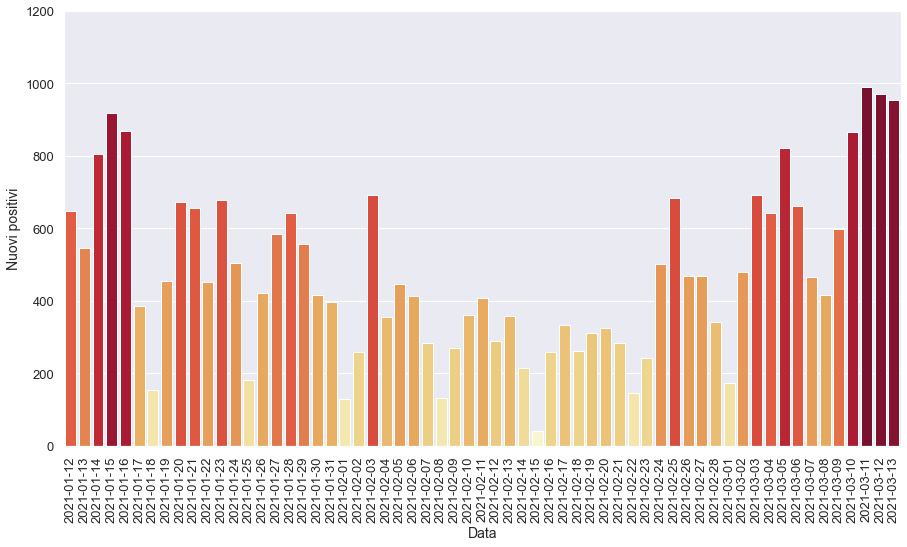

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

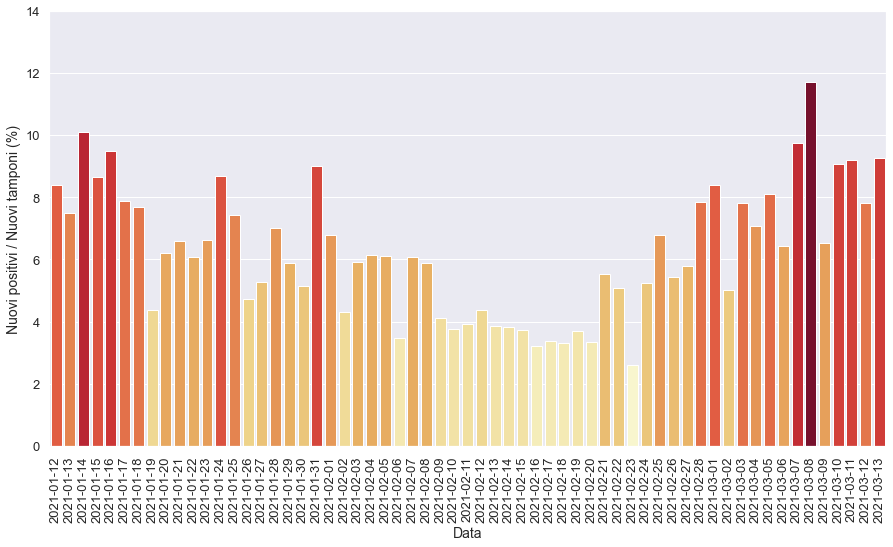

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

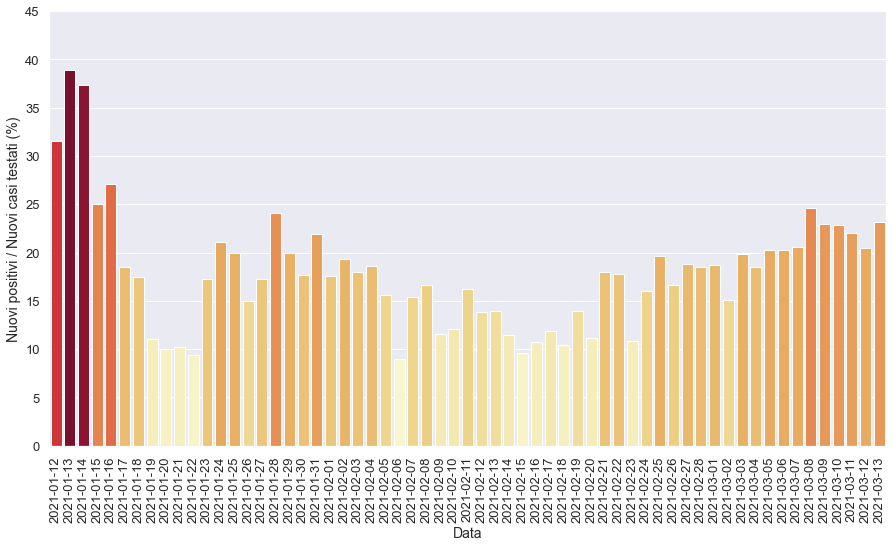

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

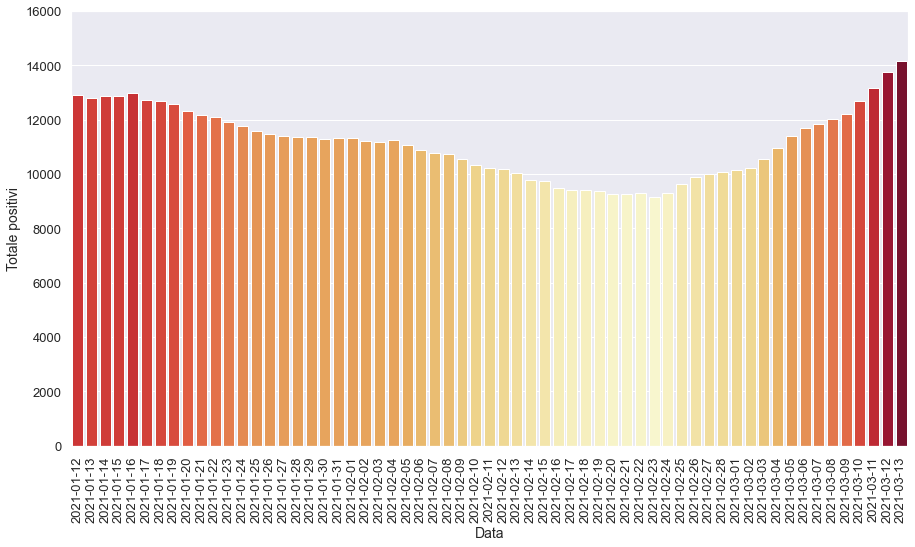

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

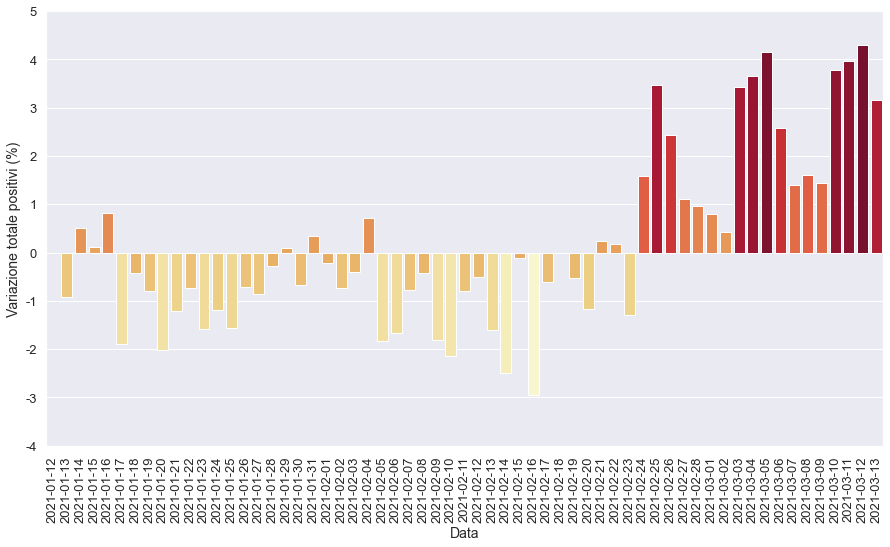

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

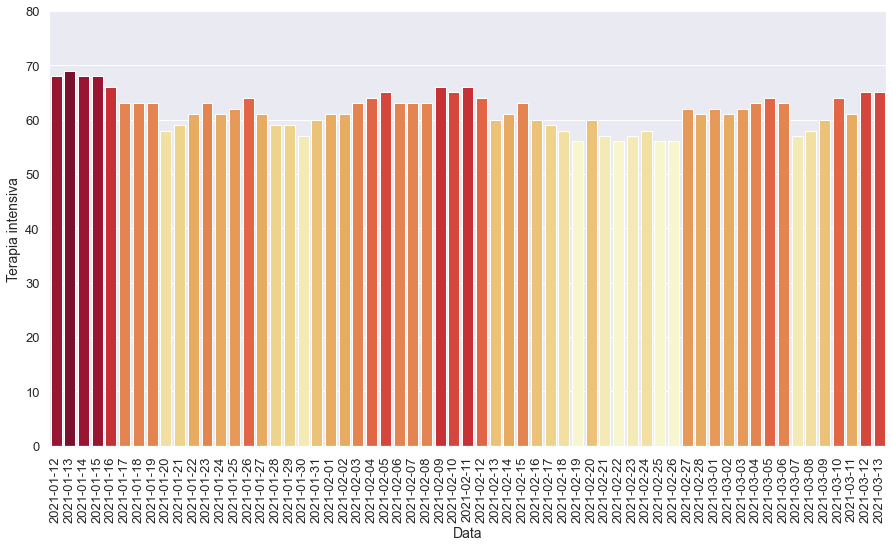

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

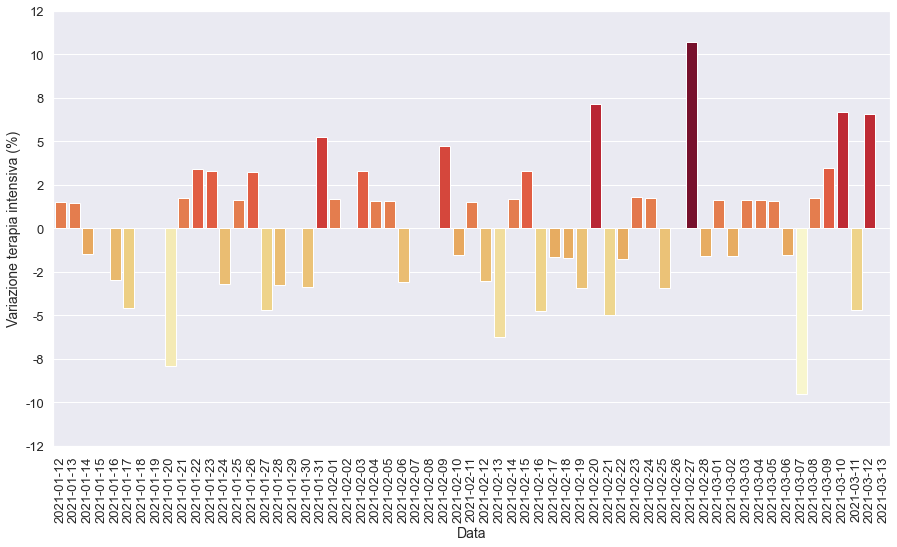

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

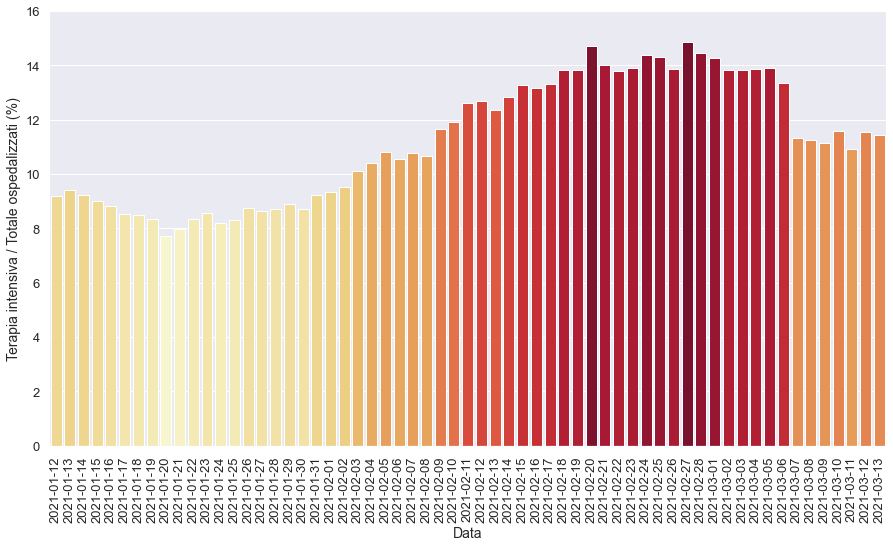

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

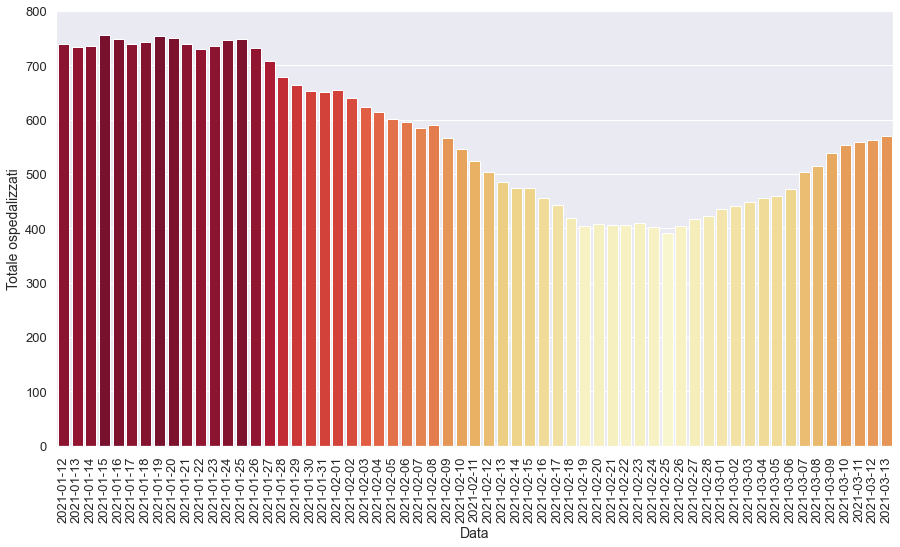

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

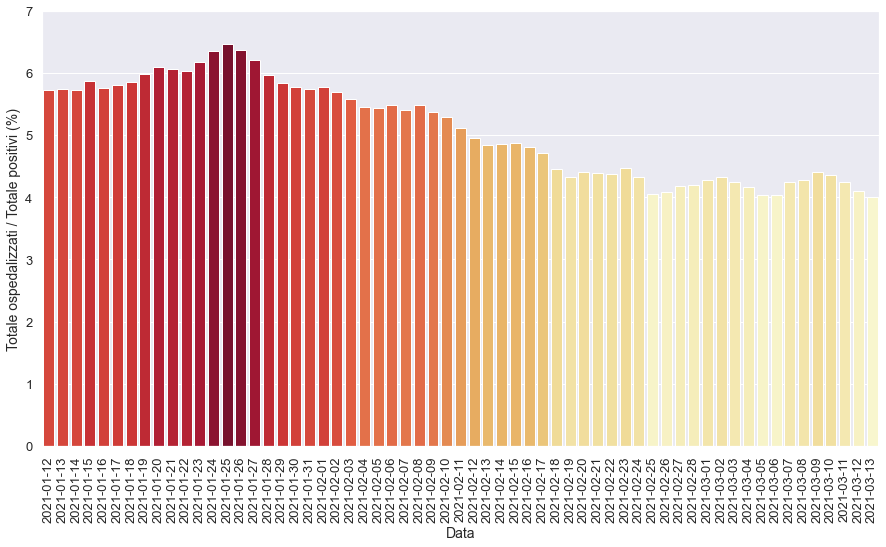

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

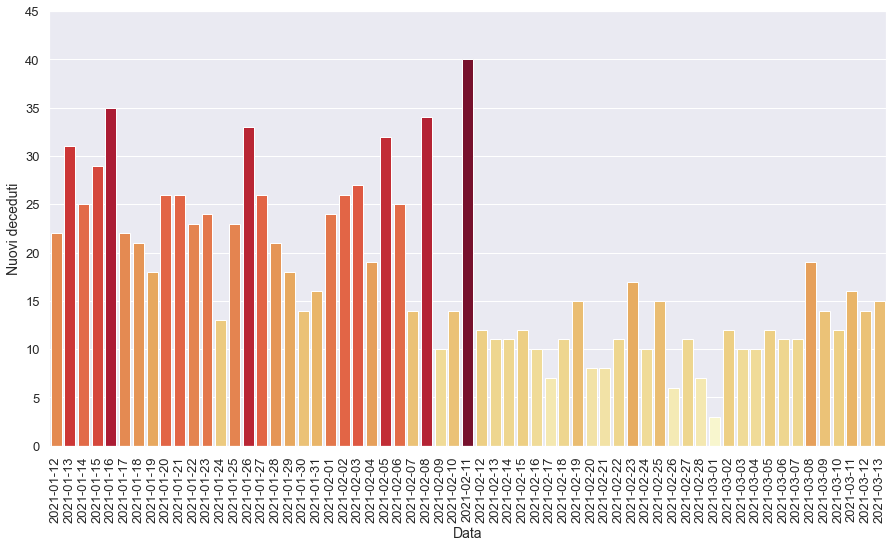

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

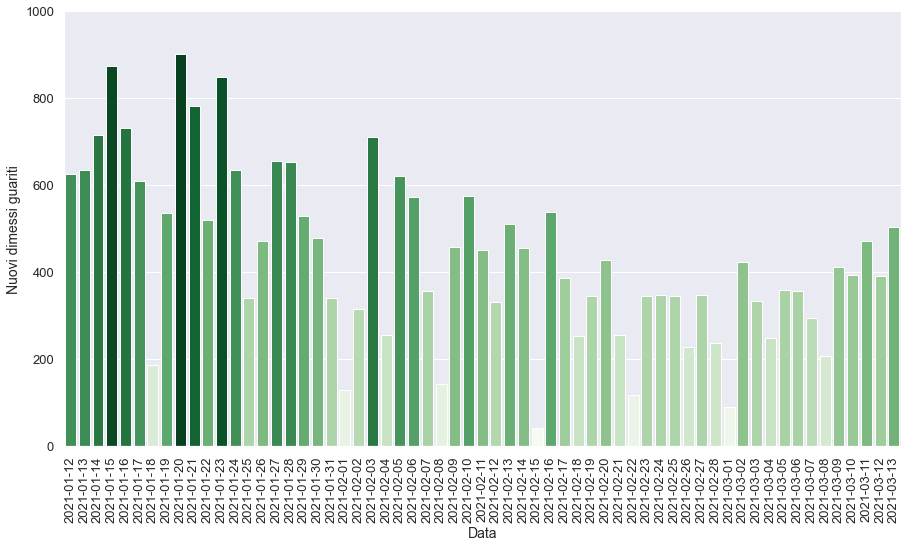

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-11T17:00:00,6,Friuli Venezia Giulia,457,66,523,9714,10237,-82,409,...,40.0,10473.0,2528.0,-59.0,12.62,5.11,3.91,16.18,1.54,-0.79
1,2021-02-12T17:00:00,6,Friuli Venezia Giulia,440,64,504,9681,10185,-52,290,...,12.0,6638.0,2096.0,-33.0,12.70,4.95,4.37,13.84,-3.03,-0.51
2,2021-02-13T17:00:00,6,Friuli Venezia Giulia,425,60,485,9536,10021,-164,357,...,11.0,9261.0,2568.0,-145.0,12.37,4.84,3.85,13.90,-6.25,-1.61
3,2021-02-14T17:00:00,6,Friuli Venezia Giulia,414,61,475,9296,9771,-250,216,...,11.0,5638.0,1887.0,-240.0,12.84,4.86,3.83,11.45,1.67,-2.49
4,2021-02-15T17:00:00,6,Friuli Venezia Giulia,412,63,475,9284,9759,-12,40,...,12.0,1072.0,415.0,-12.0,13.26,4.87,3.73,9.64,3.28,-0.12
5,2021-02-16T17:00:00,6,Friuli Venezia Giulia,396,60,456,9015,9471,-288,260,...,10.0,8082.0,2430.0,-269.0,13.16,4.81,3.22,10.70,-4.76,-2.95
6,2021-02-17T17:00:00,6,Friuli Venezia Giulia,384,59,443,8969,9412,-59,333,...,7.0,9872.0,2807.0,-46.0,13.32,4.71,3.37,11.86,-1.67,-0.62
7,2021-02-18T17:00:00,6,Friuli Venezia Giulia,361,58,419,8991,9410,-2,262,...,11.0,7885.0,2518.0,22.0,13.84,4.45,3.32,10.41,-1.69,-0.02
8,2021-02-19T17:00:00,6,Friuli Venezia Giulia,349,56,405,8956,9361,-49,310,...,15.0,8393.0,2218.0,-35.0,13.83,4.33,3.69,13.98,-3.45,-0.52
9,2021-02-20T17:00:00,6,Friuli Venezia Giulia,348,60,408,8844,9252,-109,326,...,8.0,9792.0,2918.0,-112.0,14.71,4.41,3.33,11.17,7.14,-1.16


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

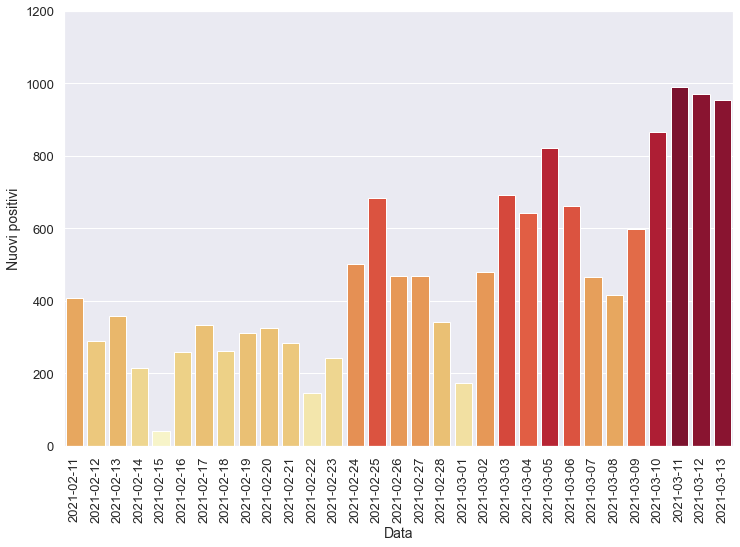

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

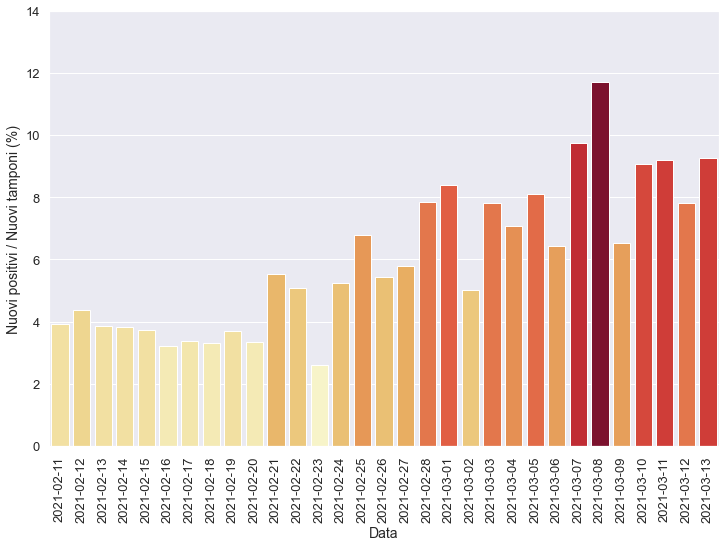

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

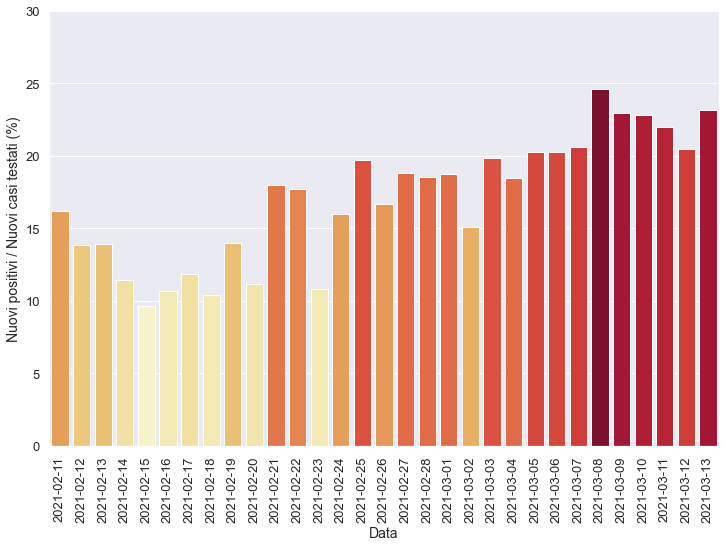

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

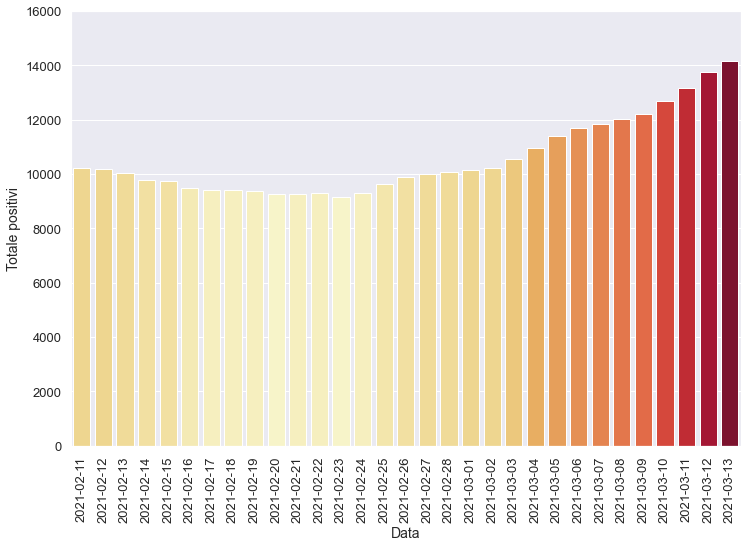

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

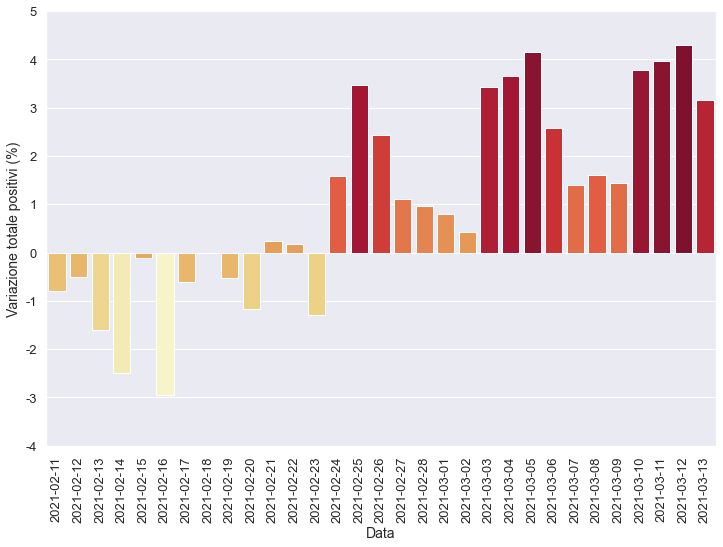

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

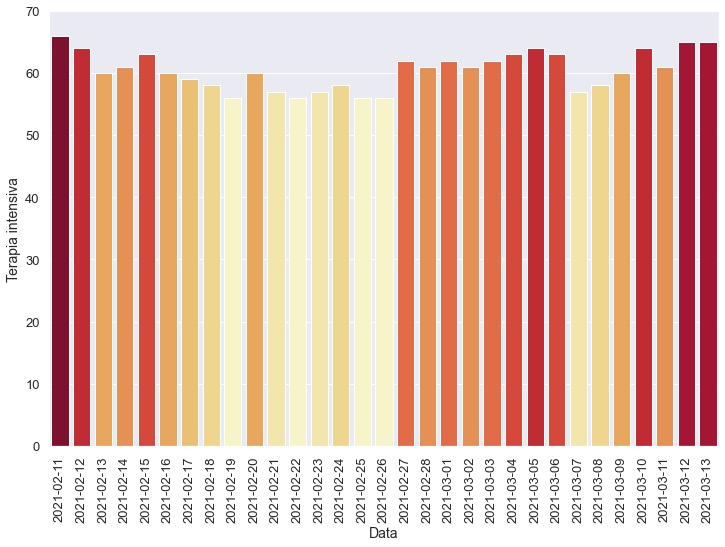

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

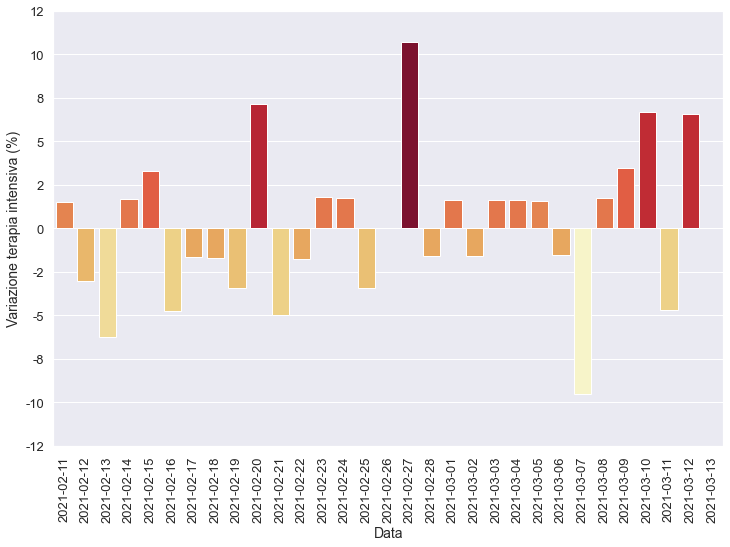

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

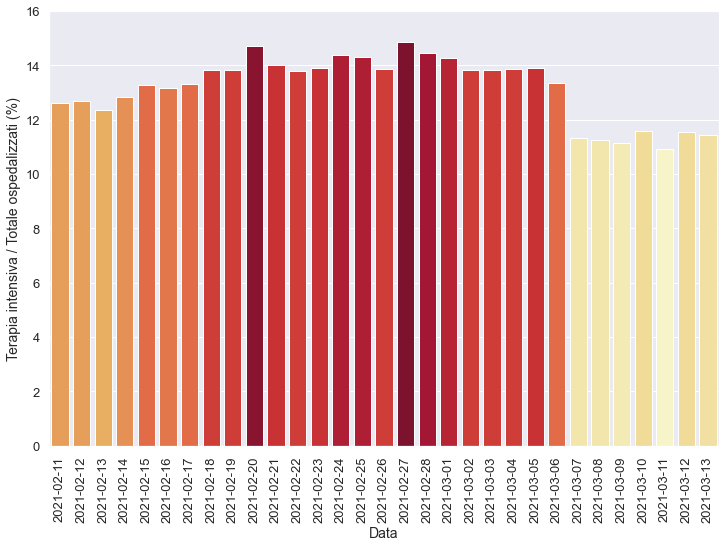

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

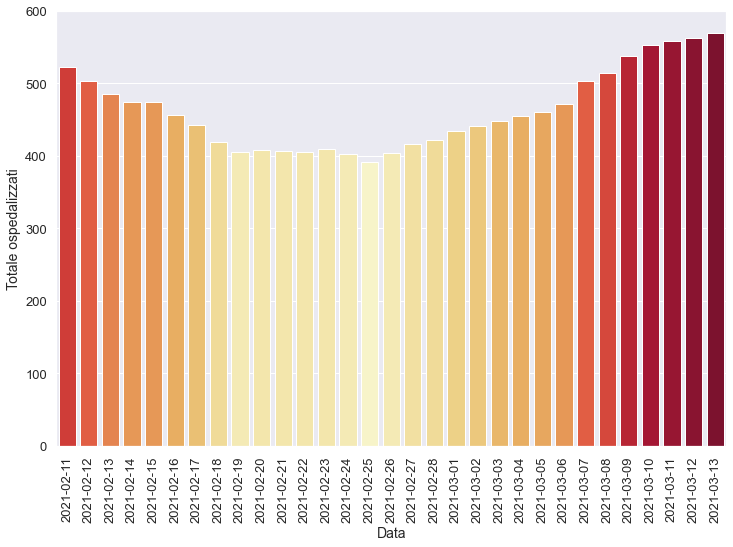

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

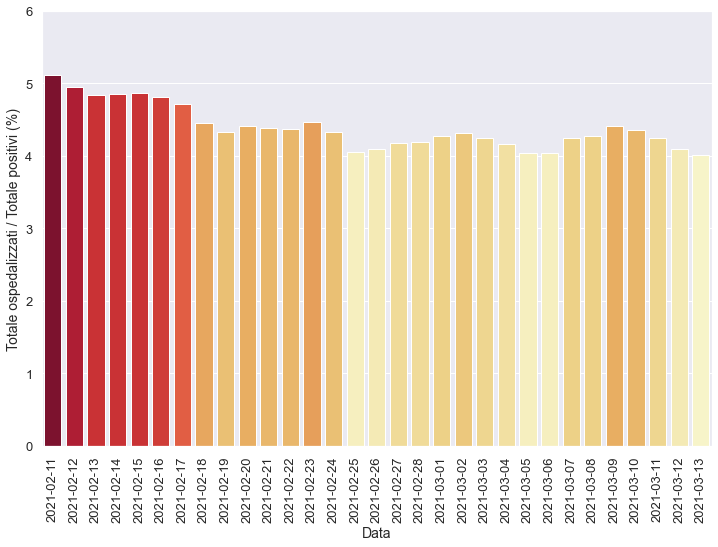

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

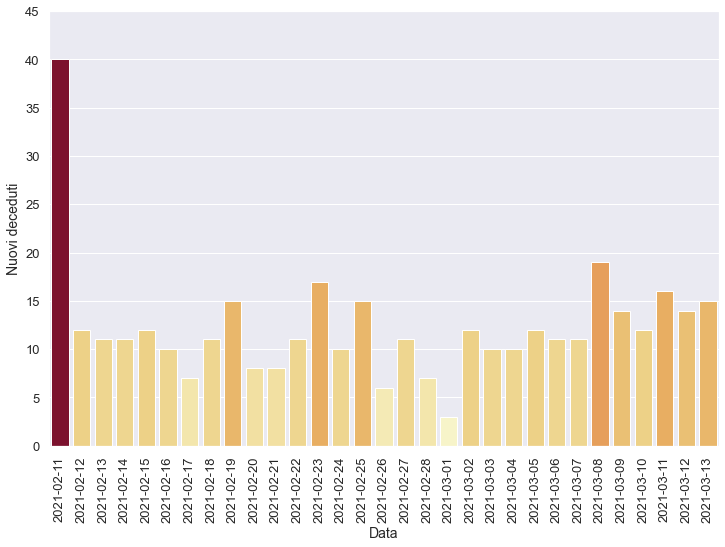

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

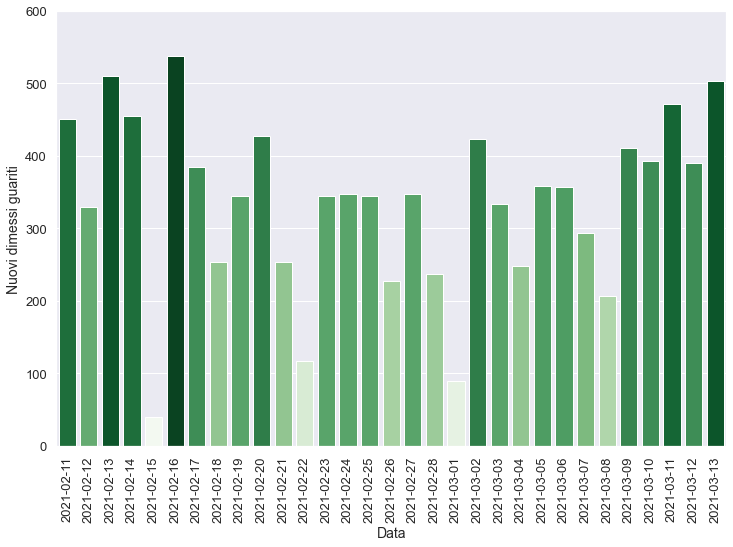

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-03-06T17:00:00,6,Friuli Venezia Giulia,409,63,472,11214,11686,293,661,...,11.0,10265.0,3258.0,281.0,13.35,4.04,6.44,20.29,-1.56,2.57
1,2021-03-07T17:00:00,6,Friuli Venezia Giulia,447,57,504,11344,11848,162,466,...,11.0,4778.0,2262.0,130.0,11.31,4.25,9.75,20.60,-9.52,1.39
2,2021-03-08T17:00:00,6,Friuli Venezia Giulia,457,58,515,11522,12037,189,415,...,19.0,3546.0,1687.0,178.0,11.26,4.28,11.70,24.60,1.75,1.60
3,2021-03-09T17:00:00,6,Friuli Venezia Giulia,478,60,538,11672,12210,173,598,...,14.0,9178.0,2604.0,150.0,11.15,4.41,6.52,22.96,3.45,1.44
4,2021-03-10T17:00:00,6,Friuli Venezia Giulia,489,64,553,12118,12671,461,866,...,12.0,9558.0,3799.0,446.0,11.57,4.36,9.06,22.80,6.67,3.78
5,2021-03-11T17:00:00,6,Friuli Venezia Giulia,497,61,558,12616,13174,503,991,...,16.0,10787.0,4510.0,498.0,10.93,4.24,9.19,21.97,-4.69,3.97
6,2021-03-12T17:00:00,6,Friuli Venezia Giulia,498,65,563,13178,13741,567,971,...,14.0,12424.0,4748.0,562.0,11.55,4.10,7.82,20.45,6.56,4.30
7,2021-03-13T17:00:00,6,Friuli Venezia Giulia,504,65,569,13606,14175,434,953,...,15.0,10288.0,4114.0,428.0,11.42,4.01,9.26,23.16,0.00,3.16


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

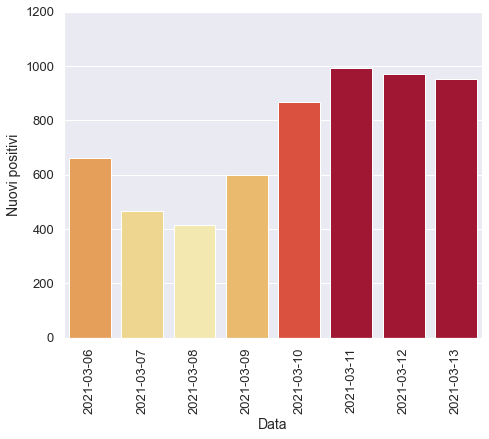

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

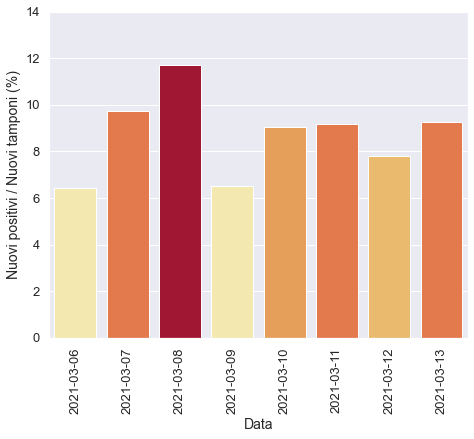

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

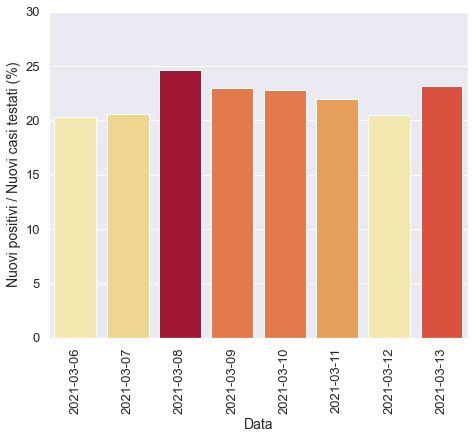

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

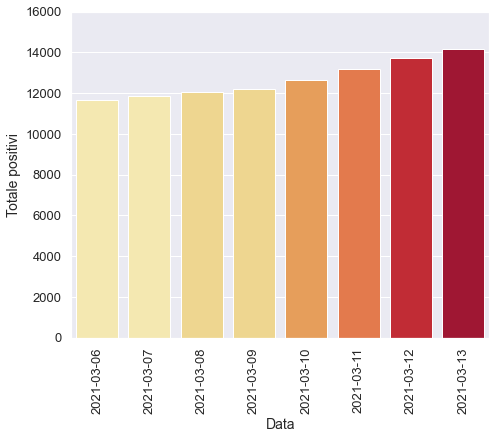

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

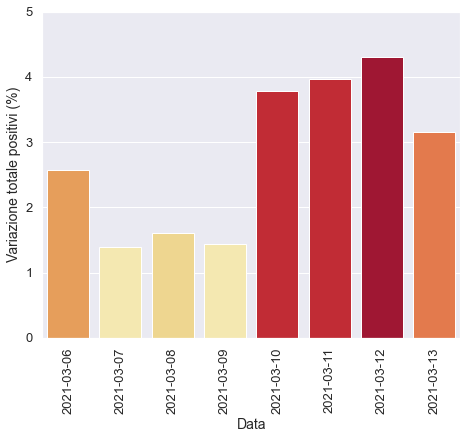

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

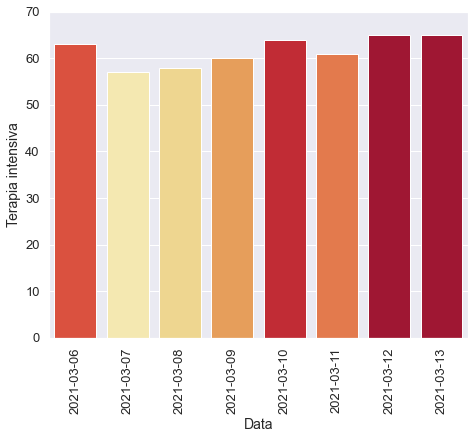

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

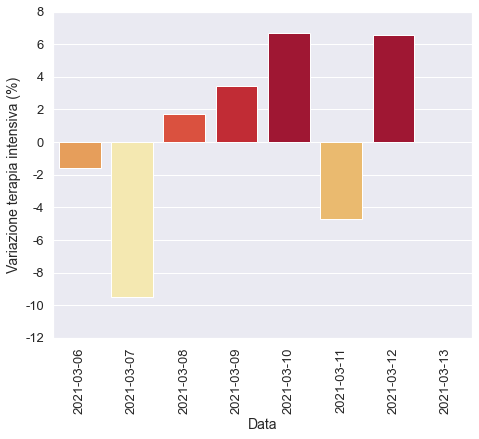

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

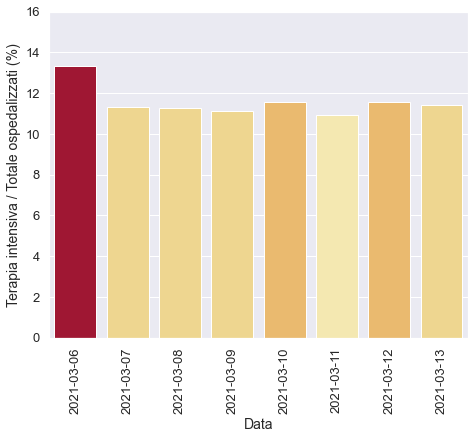

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

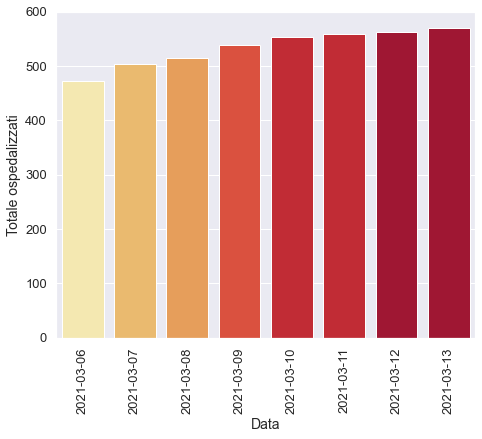

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

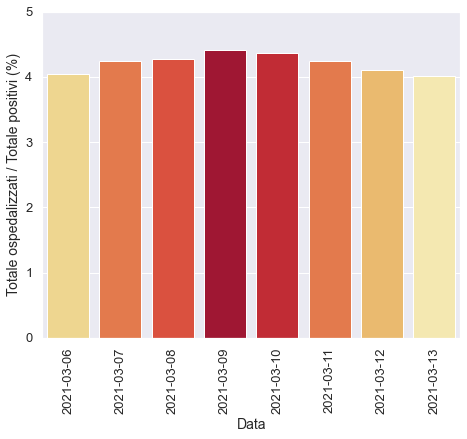

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

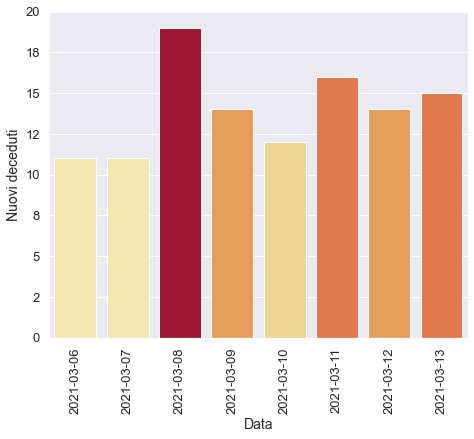

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

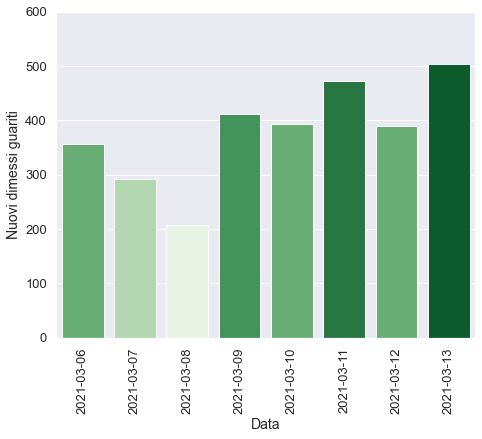

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)